In [1]:
import numpy as np
import pandas as pd
import json

df = pd.read_csv("cleaned_data.csv")
df["Affiliations"].head()

0    Department of IT, G. L. Bajaj Institute of Tec...
1    School of Translation, Interpretation Universi...
2    Department of Marketing Big Data, Mokwon Unive...
3    Center for High Performance Computing, Joint E...
4    Anna University, Department of Computer Techno...
Name: Affiliations, dtype: object

In [2]:
def get_country_list(s):
    res = str(s).split(";")
    country_list = []
    for affiniation in res:
        if affiniation.find(',') != -1:
            country = affiniation.split(", ")[-1]
            if country not in country_list:
                country_list.append(country)
    return country_list

In [3]:
df["country_list"] = df["Affiliations"].apply(get_country_list)
df["country_list"].head()

0                              [India]
1                             [Canada]
2                        [South Korea]
3    [China, Singapore, United States]
4                              [India]
Name: country_list, dtype: object

In [4]:
country_collab = {}
country_count = {}
collab_count = {}
for paper in df["country_list"]:
    paper = list(set(paper))
    if len(paper) > 1:
        for reg in paper:
            if reg not in collab_count:
                collab_count[reg] = 0
            collab_count[reg] += 1
    for i in range(len(paper)):
        if paper[i] not in country_count:
            country_count[paper[i]] = 0
        country_count[paper[i]] += 1
        # count the number for collab papers
        for j in range(i+1, len(paper)):
            if (paper[i], paper[j]) not in country_collab and (paper[j], paper[i]) not in country_collab:
                country_collab[(paper[i], paper[j])] = 1
            else:
                if (paper[i], paper[j]) in country_collab:
                    country_collab[(paper[i], paper[j])] += 1
                else:
                    country_collab[(paper[j], paper[i])] += 1


In [5]:
sorted_collab_count = dict(sorted(collab_count.items(), key=lambda item: item[1], reverse=True))

In [6]:
sorted(country_collab.items(), key=lambda item: item[1], reverse=True)[:10]

[(('United States', 'China'), 57),
 (('United States', 'India'), 38),
 (('United Kingdom', 'China'), 28),
 (('Italy', 'United States'), 26),
 (('United Kingdom', 'United States'), 26),
 (('Canada', 'United States'), 23),
 (('Australia', 'China'), 18),
 (('Indonesia', 'Malaysia'), 16),
 (('United Kingdom', 'Italy'), 16),
 (('United States', 'Germany'), 15)]

In [7]:
sorted_country_count = sorted(country_count.items(), key=lambda item: item[1], reverse=True)
sorted_country_count_filter = dict([(country,count) for country,count in sorted_country_count if count > 50])
sorted_country_count_filter

{'United States': 682,
 'China': 541,
 'India': 438,
 'Indonesia': 236,
 'United Kingdom': 214,
 'Italy': 202,
 'Spain': 141,
 'Canada': 133,
 'Germany': 130,
 'Malaysia': 104,
 'Saudi Arabia': 101,
 'Australia': 92,
 'Japan': 90,
 'Russian Federation': 72,
 'Brazil': 65,
 'Romania': 63,
 'Bangladesh': 60,
 'France': 58,
 'Turkey': 55,
 'Pakistan': 53,
 'South Korea': 52,
 'Egypt': 52,
 'United Arab Emirates': 51,
 'Mexico': 51}

In [8]:
filtered_collab_count = {}
for region in sorted_country_count_filter.keys():
    filtered_collab_count[region]=sorted_collab_count[region]
filtered_collab_count

{'United States': 259,
 'China': 169,
 'India': 106,
 'Indonesia': 37,
 'United Kingdom': 134,
 'Italy': 77,
 'Spain': 67,
 'Canada': 64,
 'Germany': 66,
 'Malaysia': 51,
 'Saudi Arabia': 66,
 'Australia': 51,
 'Japan': 29,
 'Russian Federation': 18,
 'Brazil': 25,
 'Romania': 17,
 'Bangladesh': 26,
 'France': 43,
 'Turkey': 22,
 'Pakistan': 38,
 'South Korea': 29,
 'Egypt': 24,
 'United Arab Emirates': 31,
 'Mexico': 17}

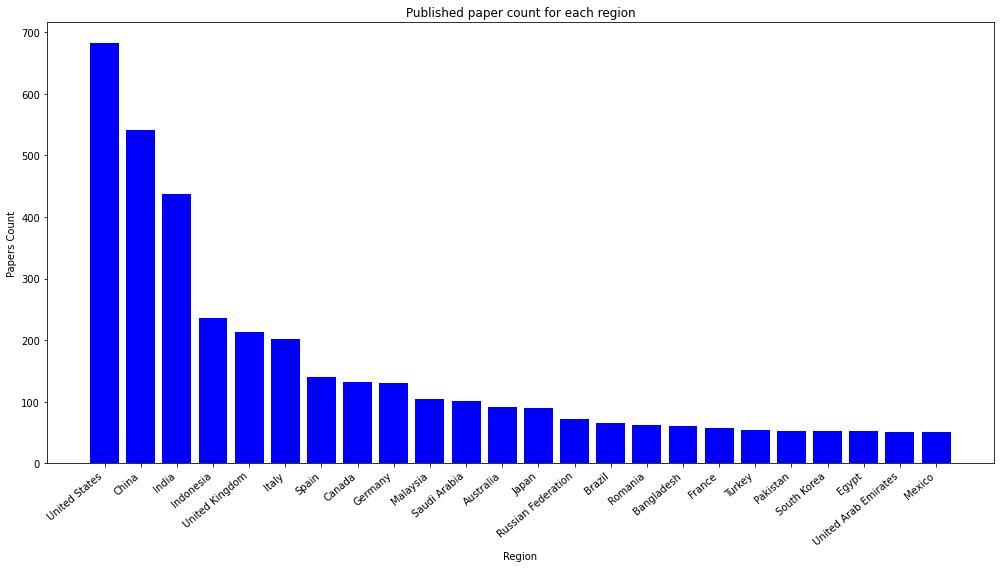

In [9]:
import matplotlib.pyplot as plt


x = list(sorted_country_count_filter.keys())
count = list(sorted_country_count_filter.values())

plt.figure(figsize=(14, 8))
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, count, color='blue')
plt.xlabel("Region")
plt.ylabel("Papers Count")
plt.title("Published paper count for each region")

plt.xticks(x_pos, x, rotation=40, ha="right")

plt.tight_layout()

plt.show()


In [10]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(sorted_country_count_filter.keys())

for edge,weight in country_collab.items():
    if edge[0] in sorted_country_count_filter.keys() and edge[1] in sorted_country_count_filter.keys():
        G.add_edge(edge[0],edge[1],weight=weight)
sorted_weight_list = sorted(list(G.edges(data=True)), key=lambda item: item[2]['weight'], reverse=True)

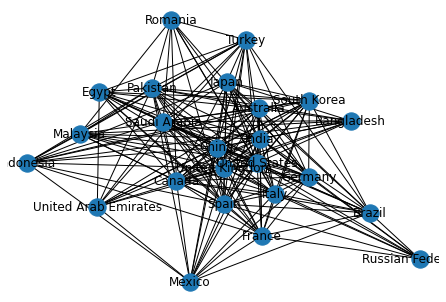

In [11]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)  # positions for all nodes

nx.draw(G,pos)
# labels = nx.get_edge_attributes(G,'weight')
# nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw_networkx_labels(G, pos)

plt.axis("off")
plt.show()

In [12]:
# find country collabration pattern
edge_dict = {}
for region in sorted_country_count_filter.keys():
    if region not in edge_dict.keys():
        edge_dict[region] = {}
    for edge in sorted_weight_list:
        if edge[0] == region:
            edge_dict[region][edge[1]] = edge[2]['weight']
        elif edge[1] == region:
            edge_dict[region][edge[0]] = edge[2]['weight']
f = open('region_collab.json','w')
json.dump(edge_dict,f)
edge_dict

{'United States': {'China': 57,
  'India': 38,
  'Italy': 26,
  'United Kingdom': 26,
  'Canada': 23,
  'Germany': 15,
  'France': 12,
  'South Korea': 12,
  'Australia': 11,
  'Spain': 11,
  'Brazil': 7,
  'Bangladesh': 7,
  'Saudi Arabia': 6,
  'Japan': 5,
  'Romania': 5,
  'Pakistan': 4,
  'Russian Federation': 4,
  'United Arab Emirates': 4,
  'Egypt': 4,
  'Mexico': 3,
  'Malaysia': 2,
  'Turkey': 1},
 'China': {'United States': 57,
  'United Kingdom': 28,
  'Australia': 18,
  'Canada': 12,
  'Germany': 9,
  'Italy': 8,
  'Saudi Arabia': 8,
  'Spain': 6,
  'Japan': 6,
  'Pakistan': 5,
  'France': 5,
  'Egypt': 5,
  'Bangladesh': 4,
  'India': 3,
  'South Korea': 3,
  'United Arab Emirates': 2,
  'Turkey': 2,
  'Indonesia': 2,
  'Russian Federation': 2,
  'Brazil': 1,
  'Malaysia': 1,
  'Mexico': 1},
 'India': {'United States': 38,
  'United Kingdom': 12,
  'Saudi Arabia': 9,
  'Canada': 7,
  'Spain': 6,
  'United Arab Emirates': 4,
  'Japan': 4,
  'China': 3,
  'Brazil': 3,
  'Mal

In [49]:
import random
import matplotlib.colors as mcolors
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 30)
colors_dict = {}
for x in range(22):
    colors_dict[x] = colors[x]
def draw_pie_chart(region, edge,type):
    regions = [x for x in edge.keys()]
    weight = [x for x in edge.values()]
    percent = [100.*y/sum(weight) for y in weight]
    plt.figure(figsize=(8,8))

    plt.axis('equal')

    patches, texts = plt.pie(weight, startangle=90, radius=1.2,colors=[colors_dict[key] for key in regions],shadow=True)
    labels = ['{0} - {1:1.2f} %'.format("topic"+str(int(i)), j) for i, j in zip(regions, percent)]
    sort_legend = True
    if sort_legend:
        patches, labels, dummy = zip(*sorted(zip(patches, labels, weight),
                                         key=lambda x: x[2],
                                         reverse=True))

    plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),fontsize=8)
    plt.title(region)
    title = type + "_" + region + ".png"
    plt.savefig(title,bbox_inches="tight")
    plt.show()


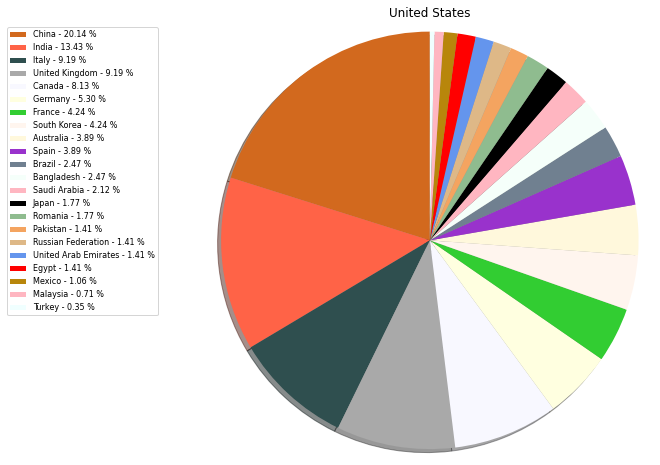

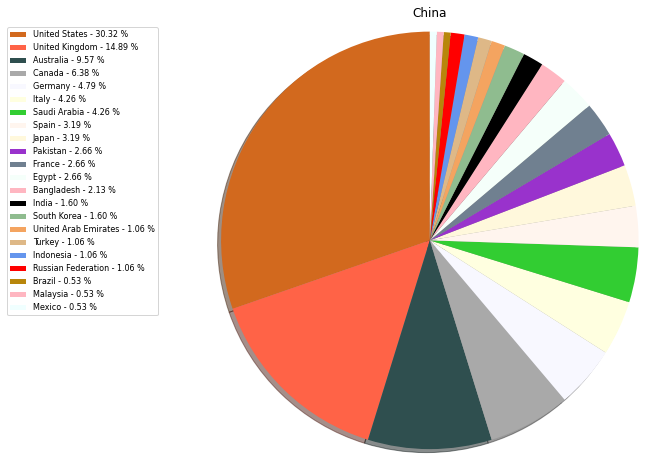

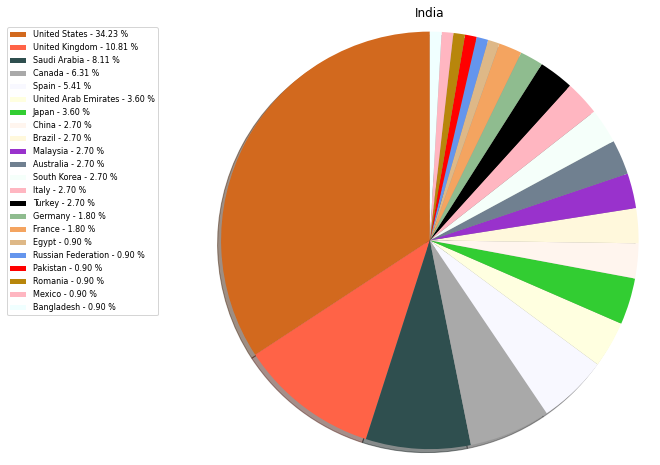

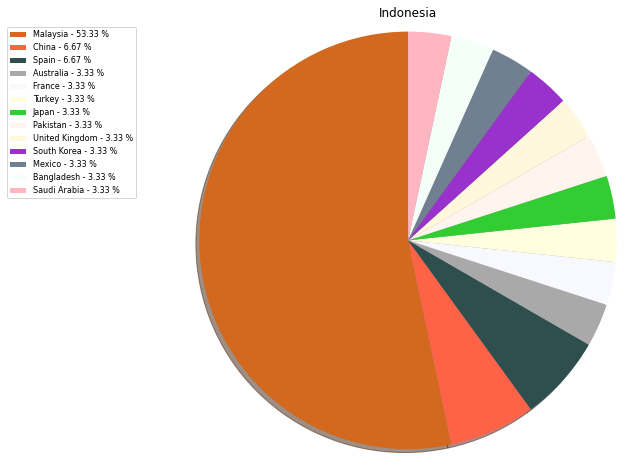

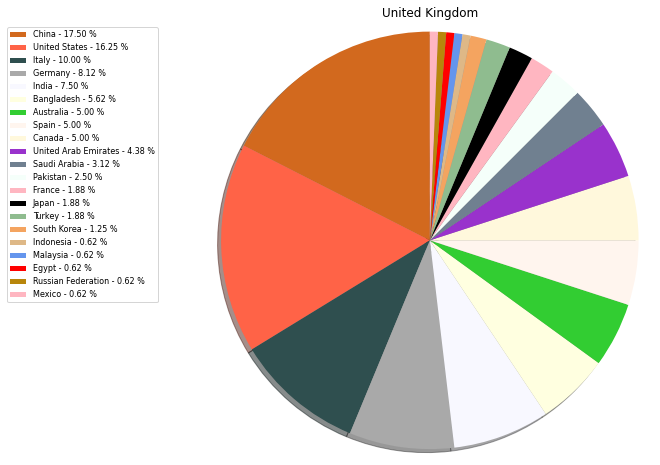

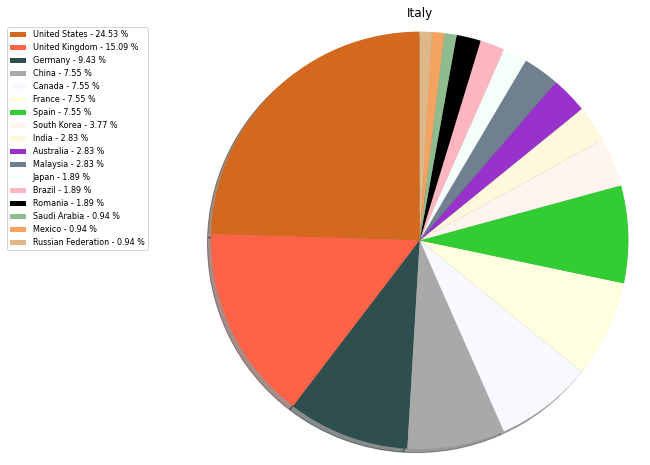

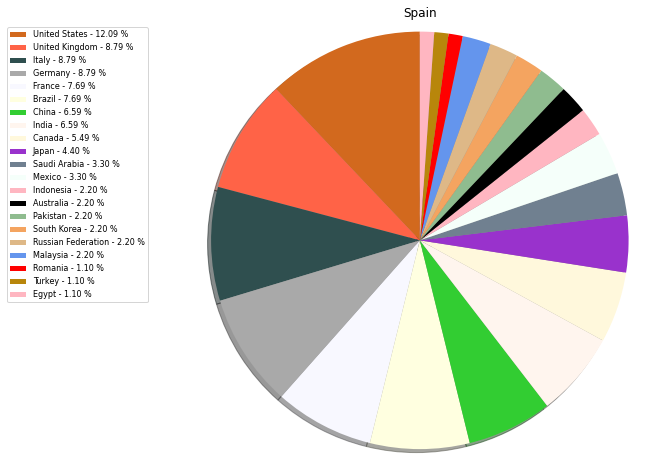

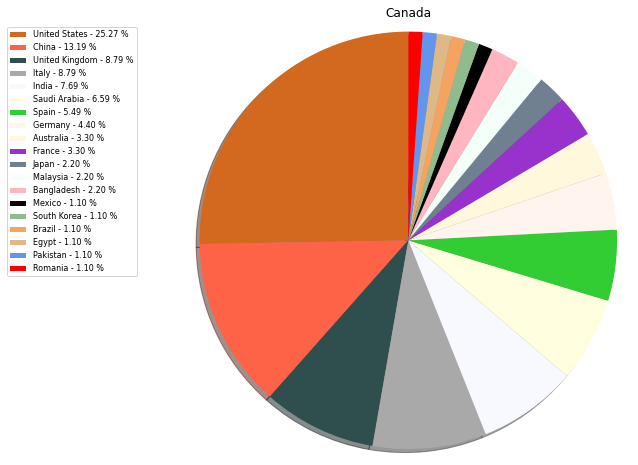

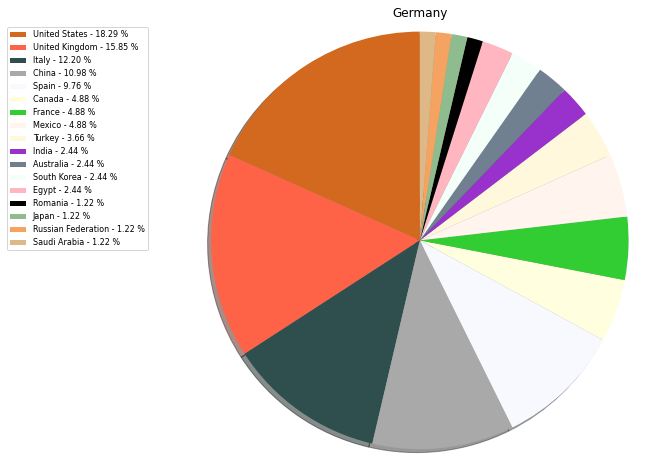

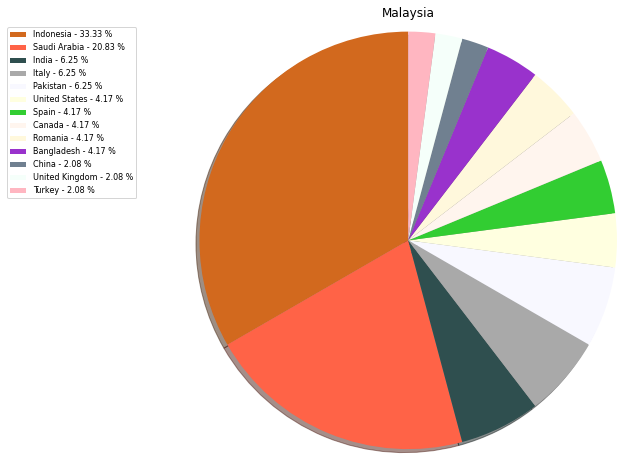

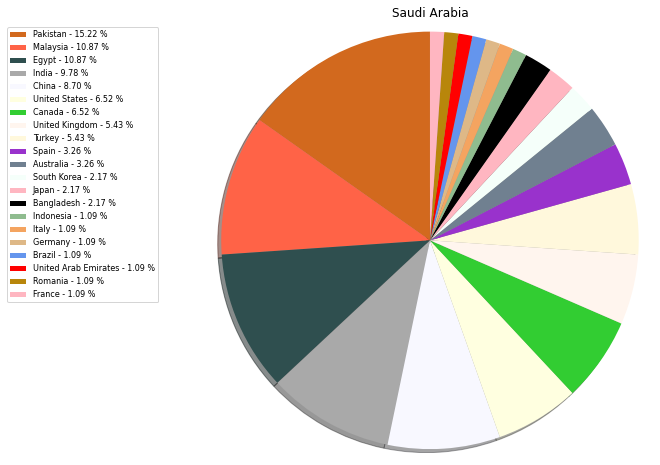

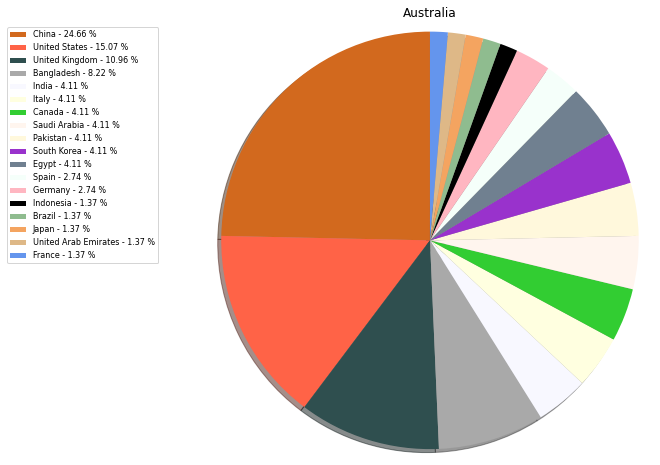

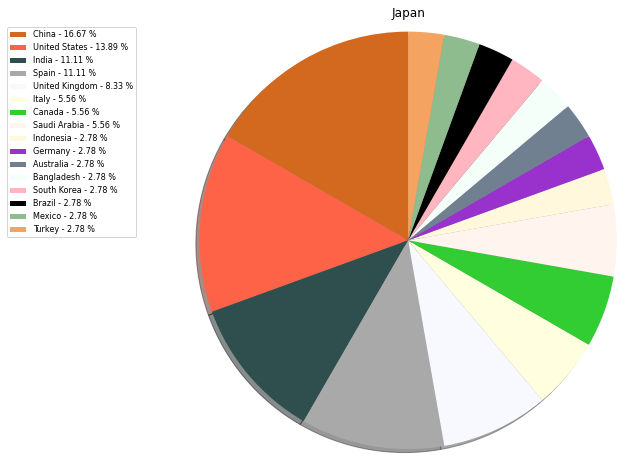

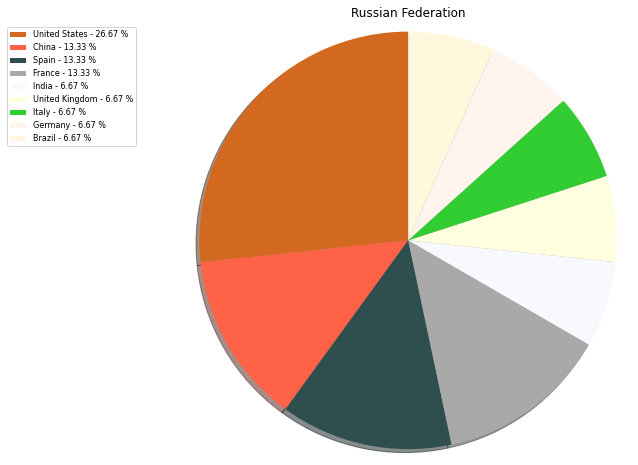

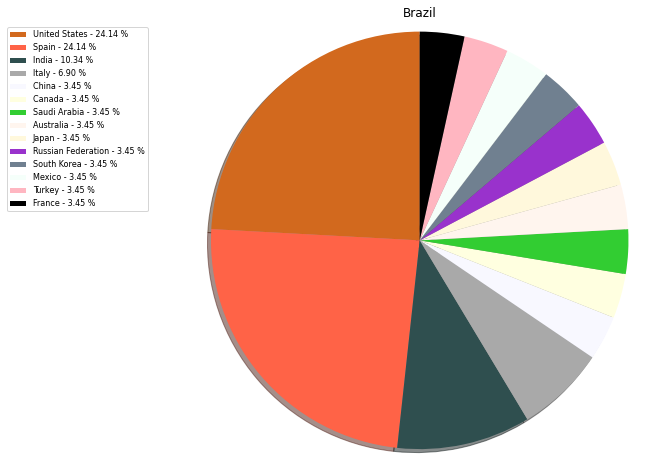

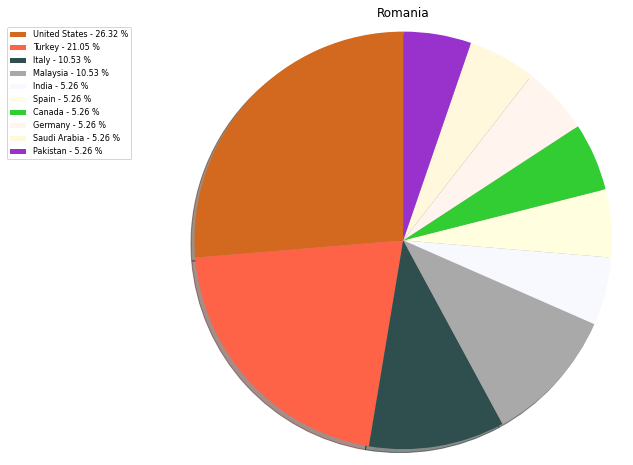

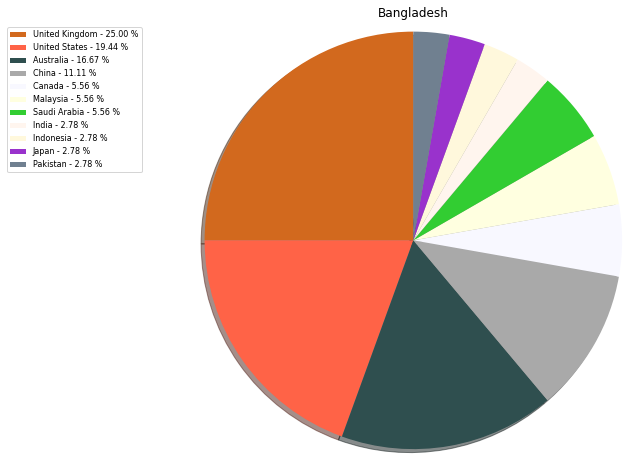

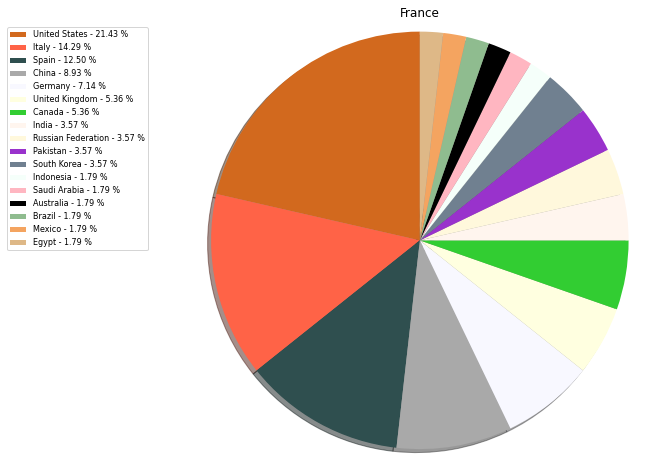

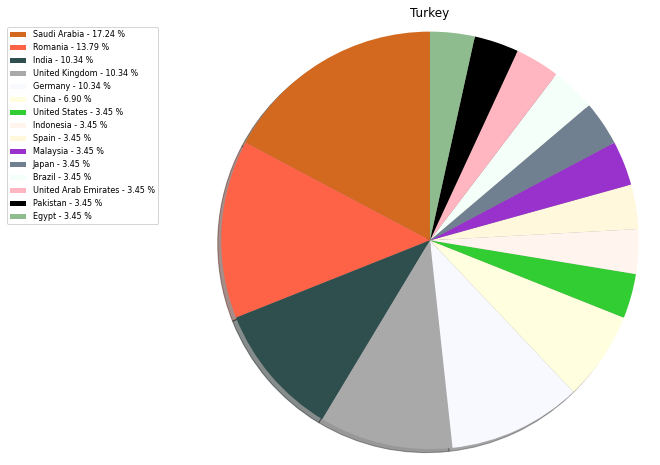

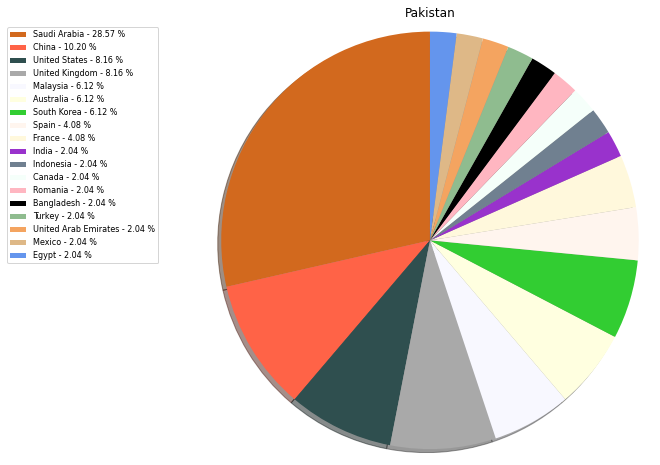

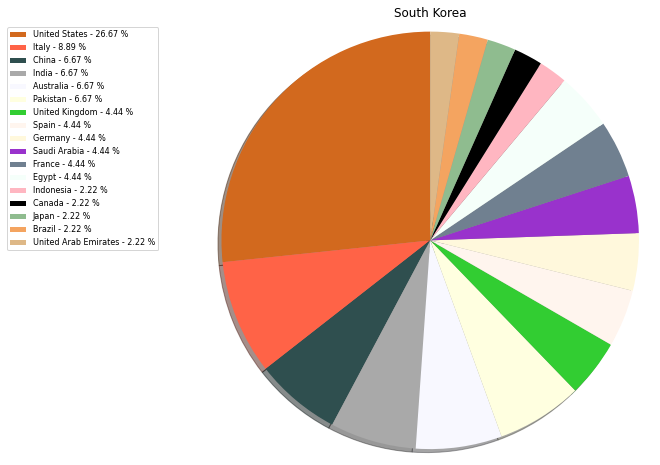

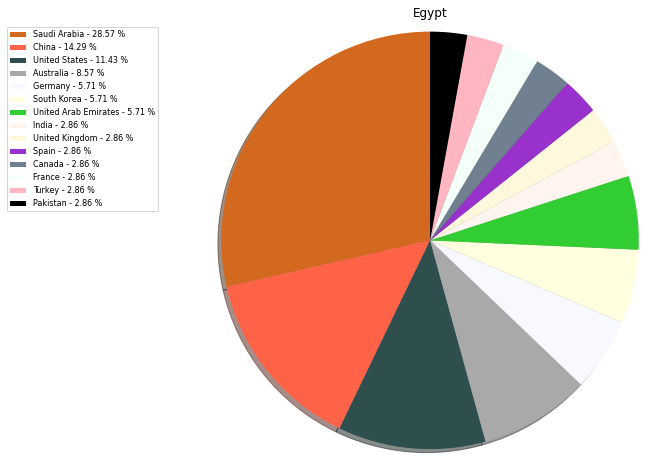

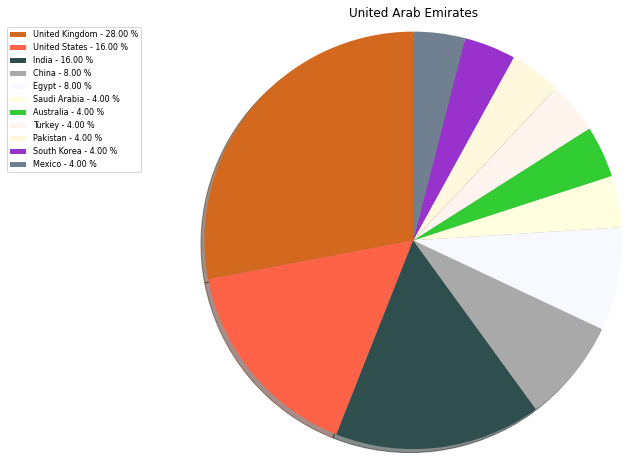

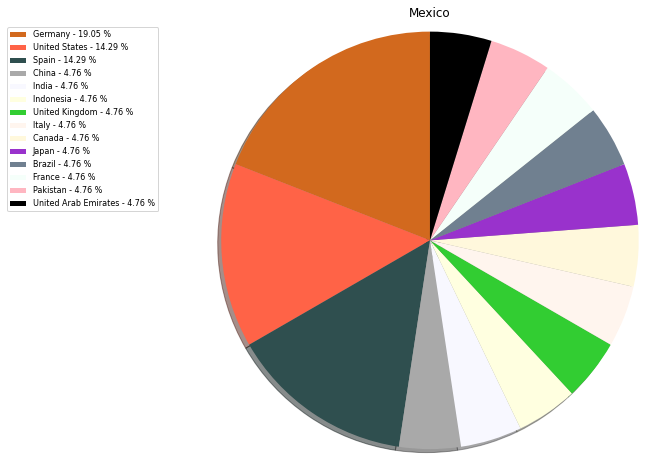

In [14]:
for (region,edge) in edge_dict.items():
    draw_pie_chart(region,edge,type="collab")

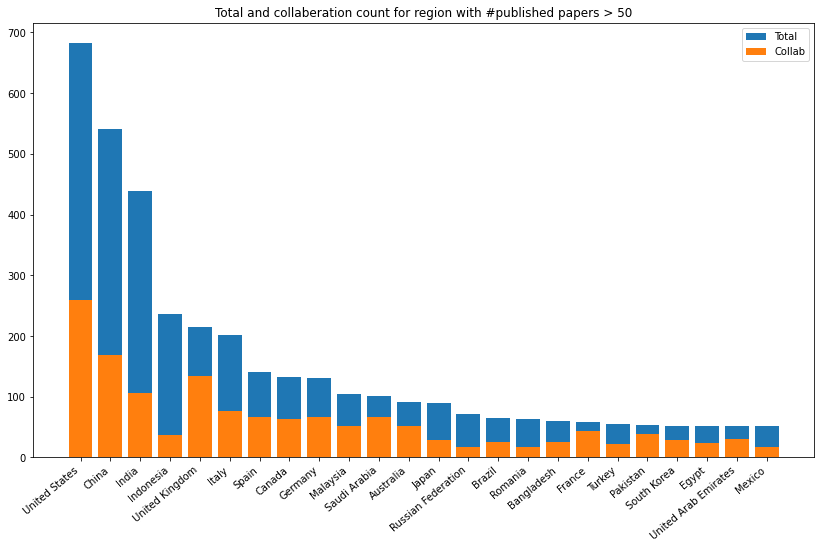

In [15]:
plt.figure(figsize=(14, 8))
x_pos = [i for i, _ in enumerate(list(sorted_country_count_filter.keys()))]
plt.bar(x_pos, list(sorted_country_count_filter.values()),
       label='Total')
plt.bar(x_pos, list(filtered_collab_count.values()), label='Collab')

plt.xticks(x_pos, list(sorted_country_count_filter.keys()), rotation=40, ha="right")

plt.title('Total and collaberation count for region with #published papers > 50')
plt.legend()

plt.show()

In [16]:
collab_rate = {}
for region,count in sorted_country_count_filter.items():
    collab_rate[region] =round(filtered_collab_count[region]/count,2)
dict(sorted(list(collab_rate.items()),key=lambda x : x[1],reverse=True))

{'France': 0.74,
 'Pakistan': 0.72,
 'Saudi Arabia': 0.65,
 'United Kingdom': 0.63,
 'United Arab Emirates': 0.61,
 'South Korea': 0.56,
 'Australia': 0.55,
 'Germany': 0.51,
 'Malaysia': 0.49,
 'Spain': 0.48,
 'Canada': 0.48,
 'Egypt': 0.46,
 'Bangladesh': 0.43,
 'Turkey': 0.4,
 'United States': 0.38,
 'Italy': 0.38,
 'Brazil': 0.38,
 'Mexico': 0.33,
 'Japan': 0.32,
 'China': 0.31,
 'Romania': 0.27,
 'Russian Federation': 0.25,
 'India': 0.24,
 'Indonesia': 0.16}

In [17]:
nx.set_node_attributes(G, sorted_country_count_filter, "total_count")
nx.set_node_attributes(G, filtered_collab_count, "collab_count")
nx.set_node_attributes(G, collab_rate, "collab_rate")

In [18]:
collab_region_count = {}
for region,collab_dict in edge_dict.items():
    collab_region_count[region] = len(list(set(collab_dict.keys())))
dict(sorted(collab_region_count.items(),key=lambda item: item[1], reverse=True))


{'United States': 22,
 'China': 22,
 'India': 22,
 'United Kingdom': 21,
 'Spain': 21,
 'Saudi Arabia': 21,
 'Canada': 19,
 'Australia': 18,
 'Pakistan': 18,
 'Italy': 17,
 'Germany': 17,
 'France': 17,
 'South Korea': 17,
 'Japan': 16,
 'Turkey': 15,
 'Brazil': 14,
 'Egypt': 14,
 'Mexico': 14,
 'Indonesia': 13,
 'Malaysia': 13,
 'Bangladesh': 11,
 'United Arab Emirates': 11,
 'Romania': 10,
 'Russian Federation': 9}

In [19]:
nx.set_node_attributes(G, collab_region_count, "collab_region_count")

In [20]:
nx.write_gexf(G, "region_collab.gexf")

In [21]:
df_topics = pd.read_csv("topic_modelling_res.csv")
df_topics.columns = ["Index","Title","1st_topic","1st_topic_percentage","2nd_topic","2nd_topic_percentage"]
df_topics.head()

Index                                              Title  1st_topic  \
0      0  MCNN: A deep learning based rapid diagnosis me...       15.0   
1      1  French-language COVID-19 terminology Internati...        5.0   
2      2  Exploring working group's psychological subjec...       16.0   
3      3  A novel virtual screening procedure identifies...       13.0   
4      4  Geospatial mapping, Epidemiological modelling,...        4.0   

   1st_topic_percentage  2nd_topic  2nd_topic_percentage  
0                 29.78       17.0                  7.51  
1                 13.18       17.0                 12.42  
2                 16.42       14.0                 13.02  
3                 41.29        2.0                 12.33  
4                 25.83       11.0                 13.60

In [22]:
concat_res = pd.concat([df, df_topics["1st_topic"]], axis=1)
concat_res.head()

Unnamed: 0                                            Authors  \
0           0  Tripathi A., Jain A., Mishra K.K., Pandey A.B....   
1           1                                          Bowker L.   
2           2                                Kim K.Y., Song I.K.   
3           3  Zhang H., Yang Y., Li J., Wang M., Saravanan K...   
4           4  Jenila V.M., Varalakshmi P., Sundar Rajasekar ...   

                                        Author(s) ID  \
0  57208326453;57221875424;57221865054;5722100955...   
1                                        6603844230;   
2                           52763405400;56082843200;   
3  57205603988;57215379404;57190290261;5721692686...   
4               57223043474;46661903700;57218503046;   

                                               Title  Year  \
0  MCNN: A deep learning based rapid diagnosis me...  2020   
1  French-language COVID-19 terminology Internati...  2020   
2  Exploring working group's psychological subjec...  2020   
3  A novel virtual screening procedure identifies...  2020   
4  Geospatial mapping, Epidemiological modelling,...  2020   

                                        Source title Volume        Issue  \
0                  Revue d'Intelligence Artificielle     34            6   
1   Journal of Internationalization and Localization      7          1-2   
2  KSII Transactions on Internet and Information ...     14           12   
3                         PLoS Computational Biology     16  12 December   
4  Proceedings of IEEE International Conference o...    NaN          NaN   

    Art. No. Page start  ...  \
0        NaN        673  ...   
1        NaN          1  ...   
2        NaN       4748  ...   
3   e1008489        NaN  ...   
4    9398398        NaN  ...   

                                            Abstract  \
0  Due to the rapidly spreading nature of coronav...   
1  The COVID-19 pandemic situation developed very...   
2  Recently, the COVID 19 pandemic has affected o...   
3  The spread of severe acute respiratory syndrom...   
4  Coronavirus disease (COVID-19) is a pandemic t...   

                                     Author Keywords  \
0  Convolutional Neural Network (ConvNet or CNN);...   
1  Canada; COVID-19; De-terminologization; Europe...   
2  Case Study; Cloud-Based Social Networking; Int...   
3                                                NaN   
4  COVID-19; Forest cover; MODIS; Normalized diff...   

                                      Index Keywords     Document Type  \
0  Diagnosis; Learning systems; Polymerase chain ...           Article   
1                                                NaN           Article   
2  Cloud computing; Mobile telecommunication syst...           Article   
3  adenosine; amoxicillin; azithromycin; clofarab...           Article   
4  Cell proliferation; Correlation methods; Demog...  Conference Paper   

  Publication Stage Open Access  Source                 EID  \
0             Final         NaN  Scopus  2-s2.0-85100515688   
1             Final         NaN  Scopus  2-s2.0-85099449898   
2             Final         NaN  Scopus  2-s2.0-85099375086   
3             Final         NaN  Scopus  2-s2.0-85098975999   
4             Final         NaN  Scopus  2-s2.0-85104683590   

                        country_list 1st_topic  
0                            [India]      15.0  
1                           [Canada]       5.0  
2                      [South Korea]      16.0  
3  [China, Singapore, United States]      13.0  
4                            [India]       4.0  

[5 rows x 27 columns]

In [23]:
concat_res = concat_res.rename(columns={'Unnamed: 0': 'Index'})

In [24]:
concat_res.head()

Index                                            Authors  \
0      0  Tripathi A., Jain A., Mishra K.K., Pandey A.B....   
1      1                                          Bowker L.   
2      2                                Kim K.Y., Song I.K.   
3      3  Zhang H., Yang Y., Li J., Wang M., Saravanan K...   
4      4  Jenila V.M., Varalakshmi P., Sundar Rajasekar ...   

                                        Author(s) ID  \
0  57208326453;57221875424;57221865054;5722100955...   
1                                        6603844230;   
2                           52763405400;56082843200;   
3  57205603988;57215379404;57190290261;5721692686...   
4               57223043474;46661903700;57218503046;   

                                               Title  Year  \
0  MCNN: A deep learning based rapid diagnosis me...  2020   
1  French-language COVID-19 terminology Internati...  2020   
2  Exploring working group's psychological subjec...  2020   
3  A novel virtual screening procedure identifies...  2020   
4  Geospatial mapping, Epidemiological modelling,...  2020   

                                        Source title Volume        Issue  \
0                  Revue d'Intelligence Artificielle     34            6   
1   Journal of Internationalization and Localization      7          1-2   
2  KSII Transactions on Internet and Information ...     14           12   
3                         PLoS Computational Biology     16  12 December   
4  Proceedings of IEEE International Conference o...    NaN          NaN   

    Art. No. Page start  ...  \
0        NaN        673  ...   
1        NaN          1  ...   
2        NaN       4748  ...   
3   e1008489        NaN  ...   
4    9398398        NaN  ...   

                                            Abstract  \
0  Due to the rapidly spreading nature of coronav...   
1  The COVID-19 pandemic situation developed very...   
2  Recently, the COVID 19 pandemic has affected o...   
3  The spread of severe acute respiratory syndrom...   
4  Coronavirus disease (COVID-19) is a pandemic t...   

                                     Author Keywords  \
0  Convolutional Neural Network (ConvNet or CNN);...   
1  Canada; COVID-19; De-terminologization; Europe...   
2  Case Study; Cloud-Based Social Networking; Int...   
3                                                NaN   
4  COVID-19; Forest cover; MODIS; Normalized diff...   

                                      Index Keywords     Document Type  \
0  Diagnosis; Learning systems; Polymerase chain ...           Article   
1                                                NaN           Article   
2  Cloud computing; Mobile telecommunication syst...           Article   
3  adenosine; amoxicillin; azithromycin; clofarab...           Article   
4  Cell proliferation; Correlation methods; Demog...  Conference Paper   

  Publication Stage Open Access  Source                 EID  \
0             Final         NaN  Scopus  2-s2.0-85100515688   
1             Final         NaN  Scopus  2-s2.0-85099449898   
2             Final         NaN  Scopus  2-s2.0-85099375086   
3             Final         NaN  Scopus  2-s2.0-85098975999   
4             Final         NaN  Scopus  2-s2.0-85104683590   

                        country_list 1st_topic  
0                            [India]      15.0  
1                           [Canada]       5.0  
2                      [South Korea]      16.0  
3  [China, Singapore, United States]      13.0  
4                            [India]       4.0  

[5 rows x 27 columns]

In [25]:
region_paper_topic_count = {}
for index,x in enumerate(concat_res["country_list"]):
    for region in x:
        if region not in region_paper_topic_count.keys():
            region_paper_topic_count[region]={}
        topic = list(concat_res.iloc[[index]]["1st_topic"])[0]
        if topic not in region_paper_topic_count[region].keys():
            region_paper_topic_count[region][topic] = 0
        region_paper_topic_count[region][topic] += 1

In [26]:
region_paper_topic_count

{'India': {15.0: 69,
  4.0: 54,
  10.0: 12,
  12.0: 43,
  13.0: 23,
  20.0: 20,
  7.0: 14,
  18.0: 33,
  6.0: 6,
  14.0: 21,
  5.0: 29,
  8.0: 26,
  3.0: 6,
  16.0: 10,
  11.0: 16,
  21.0: 7,
  0.0: 28,
  1.0: 10,
  19.0: 2,
  17.0: 2,
  9.0: 7},
 'Canada': {5.0: 10,
  15.0: 17,
  13.0: 9,
  0.0: 16,
  4.0: 9,
  11.0: 13,
  1.0: 4,
  18.0: 8,
  12.0: 6,
  7.0: 3,
  20.0: 3,
  8.0: 4,
  21.0: 6,
  9.0: 5,
  19.0: 1,
  16.0: 6,
  6.0: 5,
  3.0: 2,
  10.0: 2,
  2.0: 1,
  14.0: 3},
 'South Korea': {16.0: 3,
  12.0: 4,
  4.0: 6,
  21.0: 3,
  13.0: 6,
  15.0: 9,
  8.0: 2,
  14.0: 3,
  0.0: 4,
  1.0: 1,
  10.0: 4,
  5.0: 2,
  18.0: 2,
  9.0: 3},
 'China': {13.0: 47,
  4.0: 62,
  19.0: 6,
  8.0: 22,
  15.0: 82,
  0.0: 87,
  12.0: 11,
  21.0: 15,
  9.0: 15,
  17.0: 13,
  10.0: 9,
  18.0: 46,
  7.0: 21,
  11.0: 26,
  5.0: 16,
  6.0: 11,
  14.0: 20,
  16.0: 5,
  2.0: 4,
  1.0: 4,
  20.0: 15,
  3.0: 4},
 'Singapore': {13.0: 5,
  9.0: 4,
  8.0: 3,
  5.0: 5,
  11.0: 1,
  0.0: 2,
  19.0: 1,
  15.0: 4

In [27]:
res_json = dict(filter(lambda x: x[0] in list(sorted_country_count_filter.keys()),region_paper_topic_count.items()))

In [29]:
for region,count in res_json.items():
    res_json[region] = dict(sorted(count.items(),key=lambda x: x[1],reverse=True))
f = open("region_topic_count.json","w")
json.dump(res_json,f)

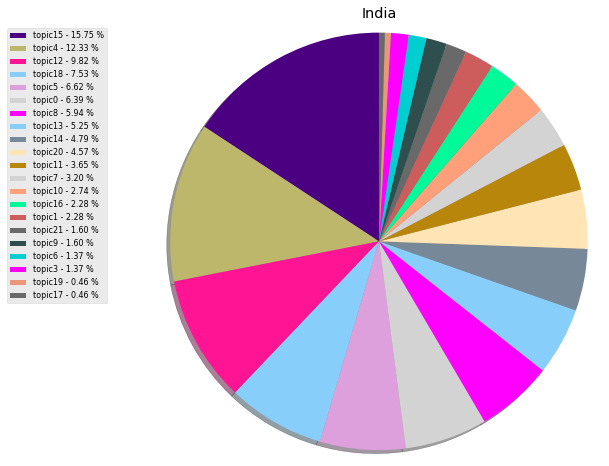

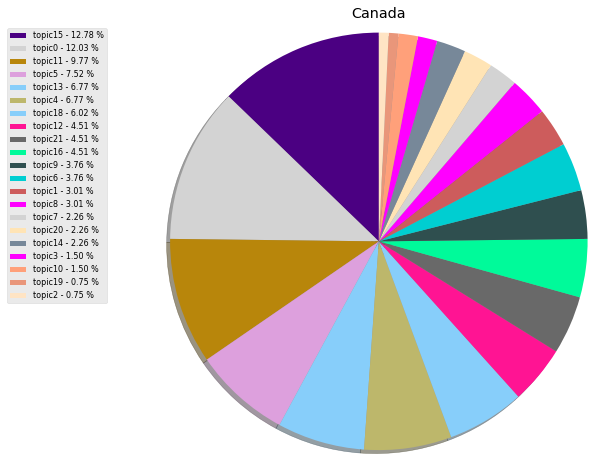

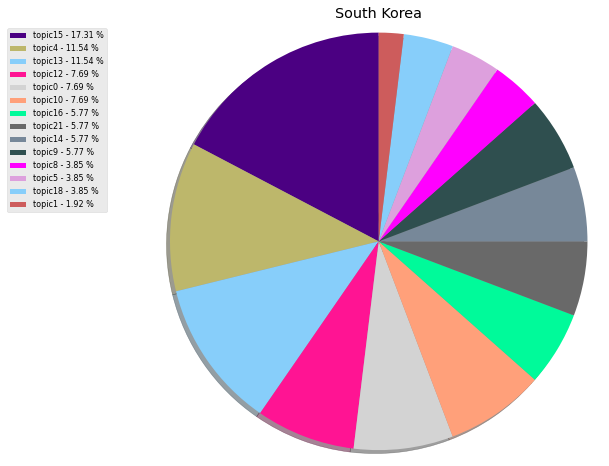

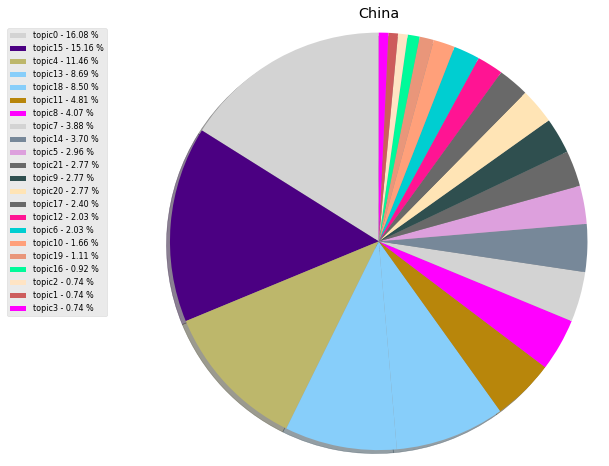

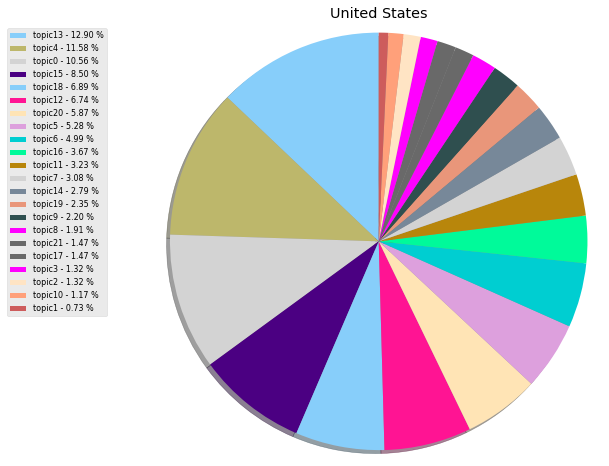

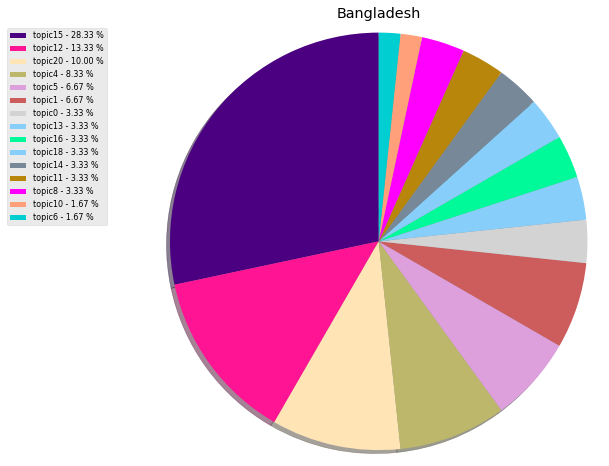

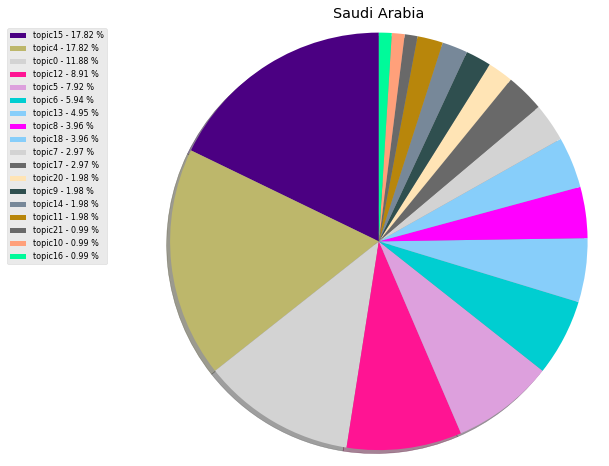

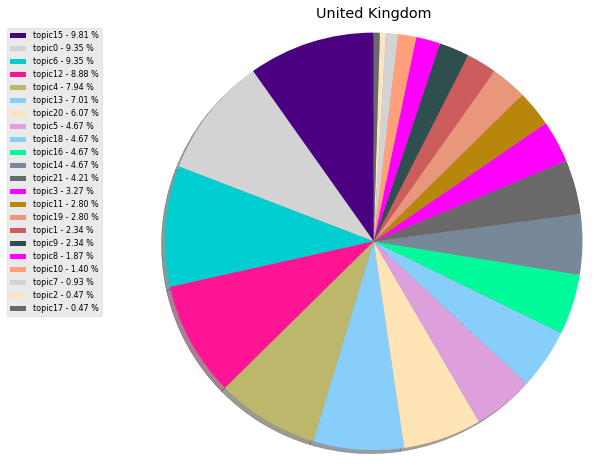

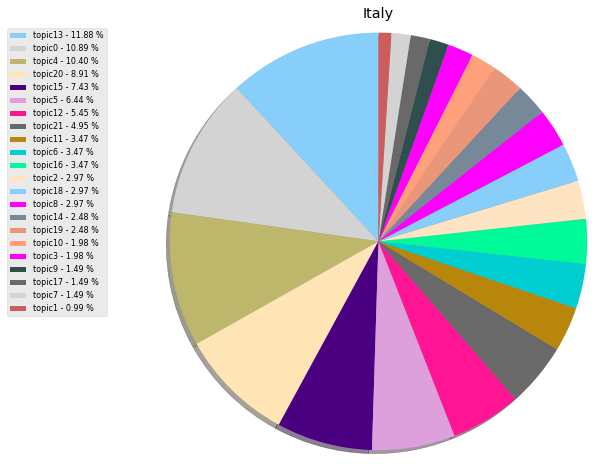

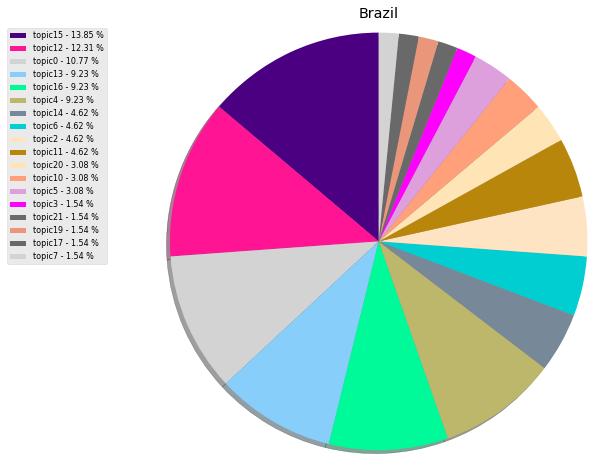

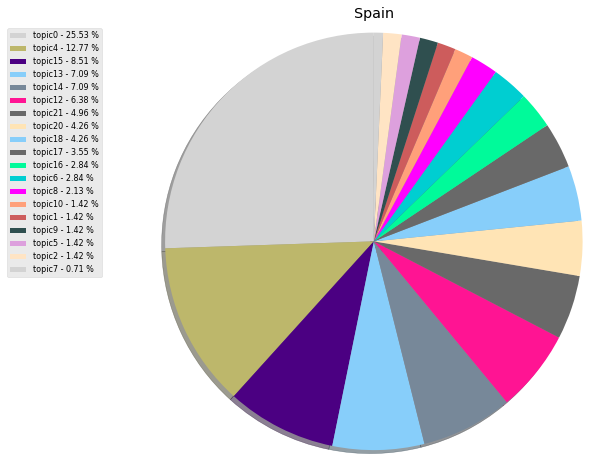

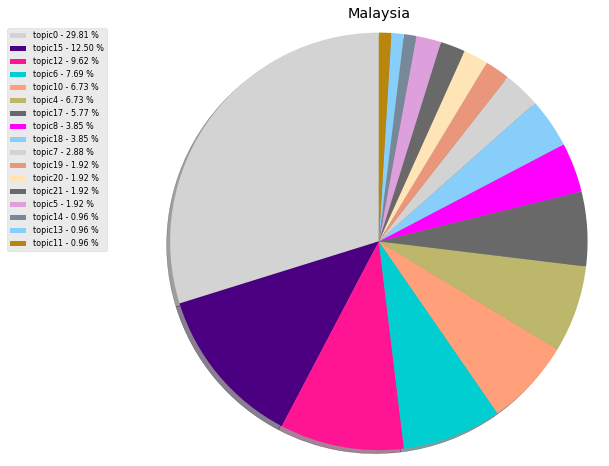

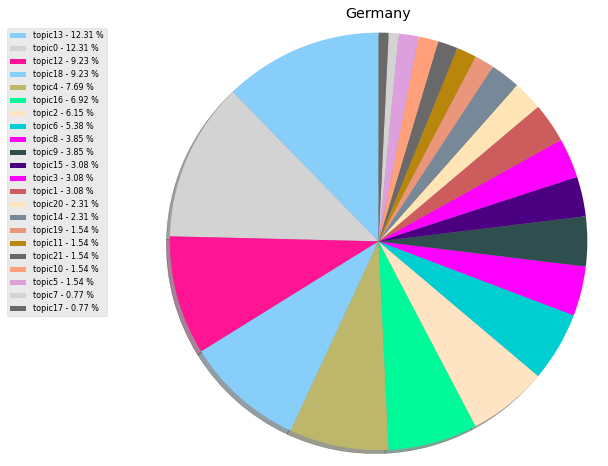

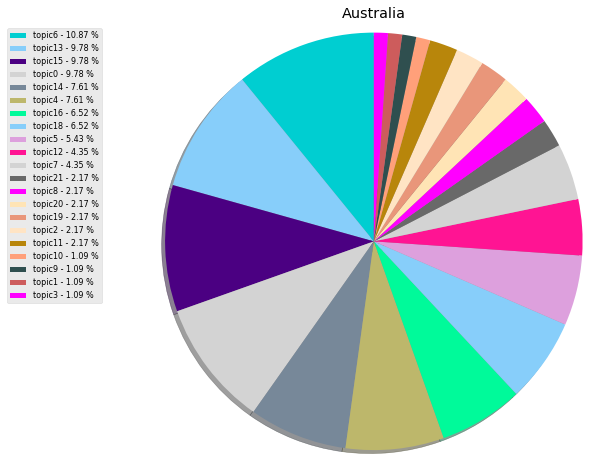

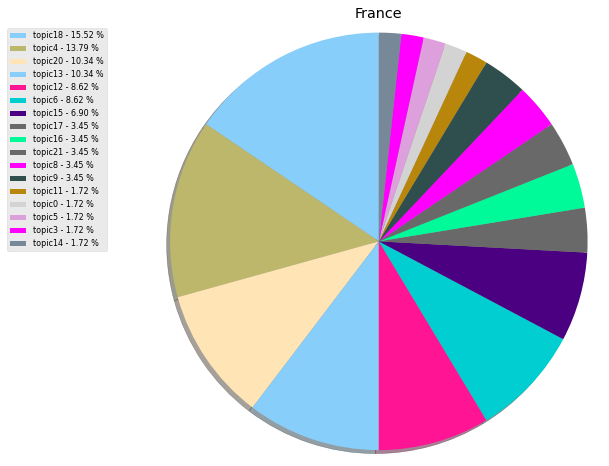

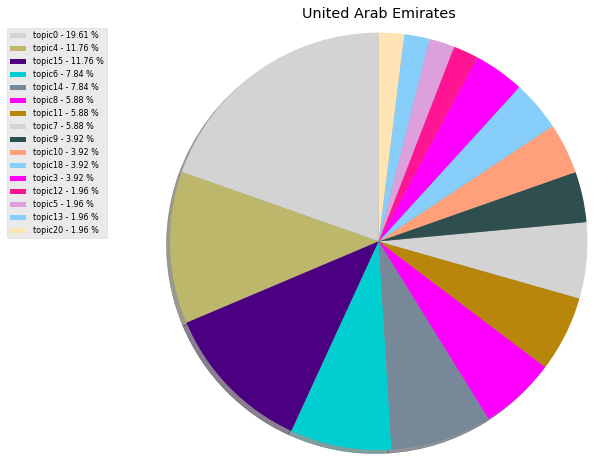

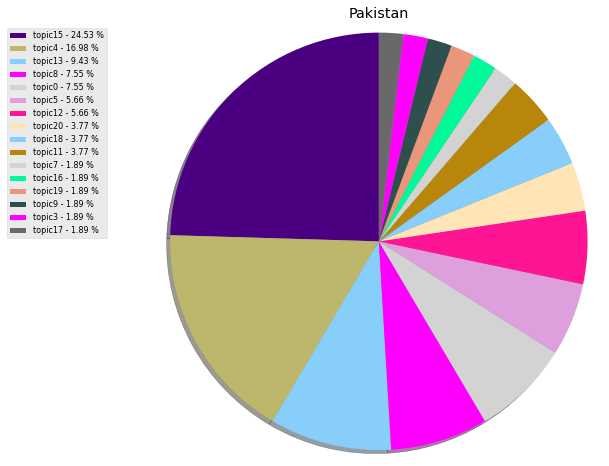

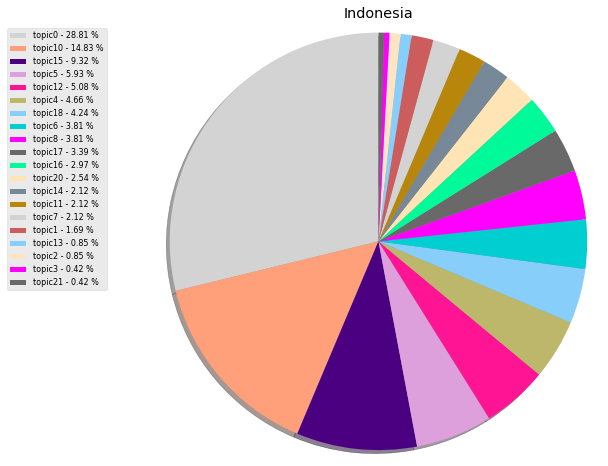

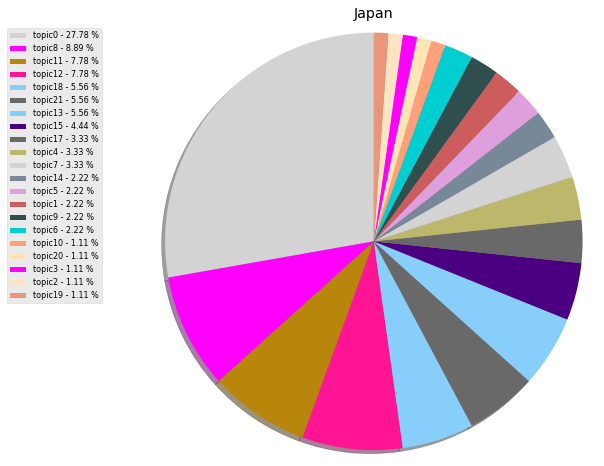

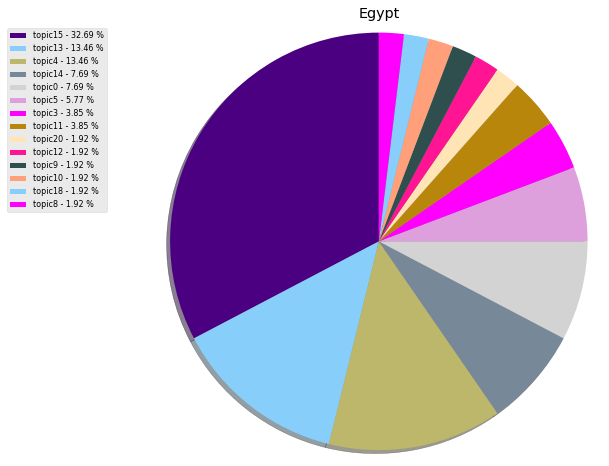

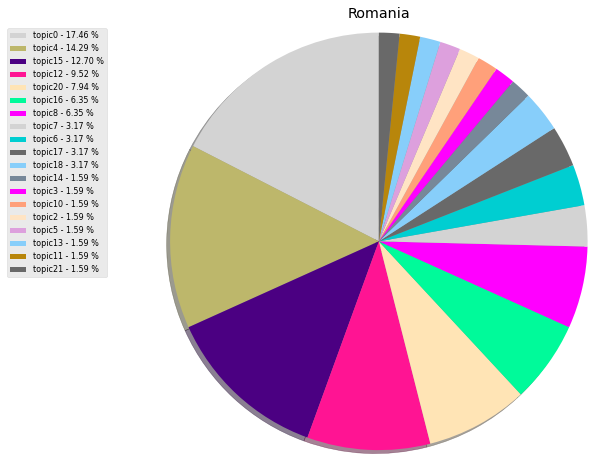

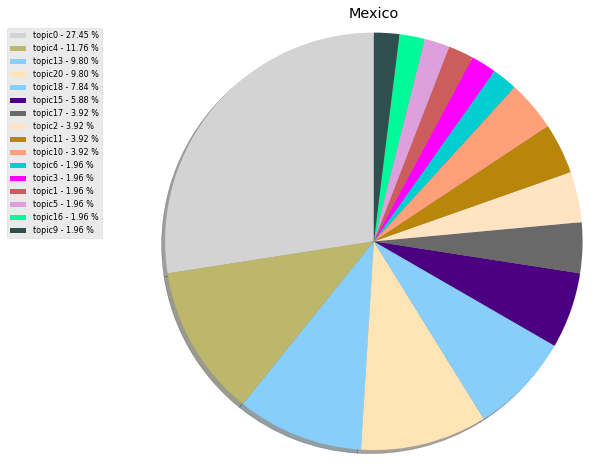

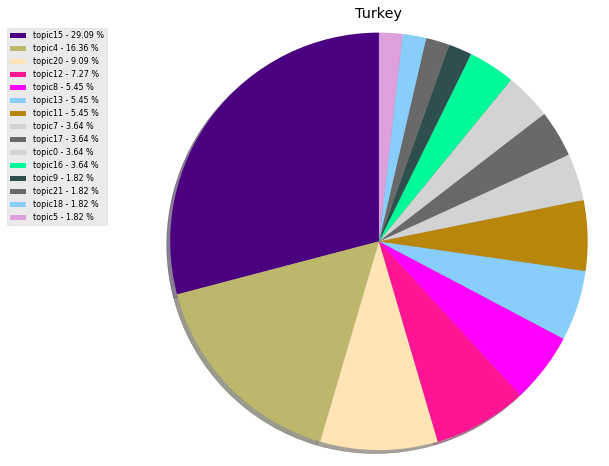

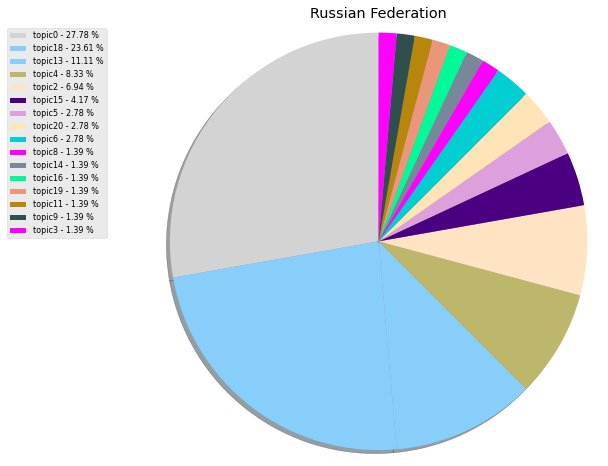

In [50]:
for (region,count) in res_json.items():
    draw_pie_chart(region,count,"topic")